### Convolutional neural network for medical images classification

### Introduction

Image classification is a technique of computer vision used for extracting features from images. Image classification has contributed significantly to medical image understand. We are going to use convolutional neural network for our implementation. CNN is the most popular type of deep learning algorithm used for image classification because of its great performance and accuracy.In this project, we have multiple classes


### Problem Statement:

* To build a robust model that classifies the medical images into separate categories or classes.

### Importing libraries

In [58]:
import pandas as pd  # data manipulation
import numpy as np  # numerical computing
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.utils import np_utils
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import os
from os import listdir
import glob as gb
from keras.preprocessing.image import DirectoryIterator
import warnings
warnings.filterwarnings("ignore")

In [5]:
import seaborn as sns

In [6]:
keras.__version__

'2.4.3'

### Data Overview

The dataset we are going to use for the image classification is the medical images. This data contains 58954 images of isze 64x64 that belong to six (6) classes. These classes are  AbdomenCT, BreastMRI, ChestCT, CXR, Hand, and HeadCT. This dataset was published by. This data is organised into 6 folders:

* Total number of images in AbdomenCT folder: 10,000
* Total number of images in ChestCT folder: 10,000
* Total number of images in BreastMRI folder: 8954
* Total number of images in CXR folder: 10,000
* Total number of images in Hand folder: 10,000
* Total number of images in HeadCT folder: 10,000

### Classes description

* AbdomenCT - Computed temography of the abdominal cavity 
* BreastMRI - Magnet resonance imaging of the breast 
* CXR - Chest X-ray
* CheestCT - Computed tomography of the chest
* Hand - Hand X-ray
* HeadCT - Computed tomography of the head

In [7]:
for folder in os.listdir("MNIST"):
    files = gb.glob(pathname= str("MNIST//"+folder + "/*.jpeg"))
    print(f" {len(files)} images are found in '{folder}' folder.")

 10000 images are found in 'AbdomenCT' folder.
 8954 images are found in 'BreastMRI' folder.
 10000 images are found in 'ChestCT' folder.
 10000 images are found in 'CXR' folder.
 10000 images are found in 'Hand' folder.
 10000 images are found in 'HeadCT' folder.


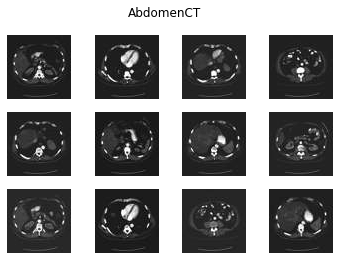

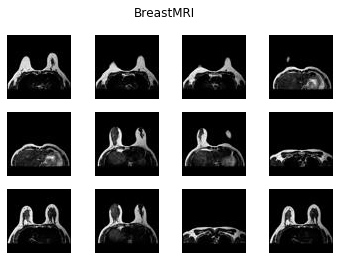

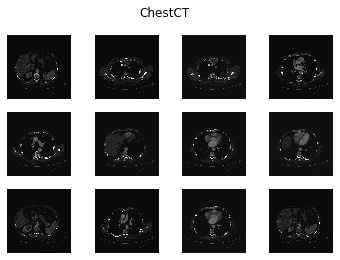

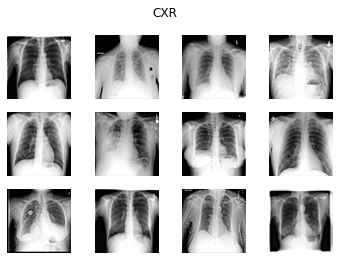

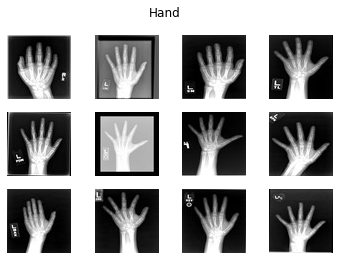

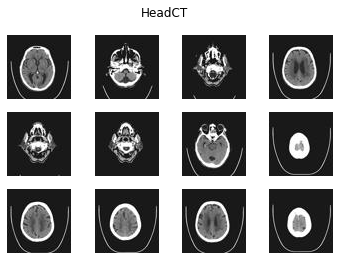

In [8]:
path = 'C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST/'

categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']
num_class = len(categories)

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img,cmap='gray')
    plt.show()

In [9]:
from pathlib import Path
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

# Create a list with the filepaths
train_dir = Path('C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST')
filepaths = list(train_dir.glob(r'**/*.jpeg'))

# Create a DataFrame with the filepaths and the labels of the picture
df = proc_img(filepaths)

print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
df.head(5)

Number of pictures: 58954

Number of different labels: 6

Labels: ['HeadCT' 'ChestCT' 'Hand' 'BreastMRI' 'AbdomenCT' 'CXR']


,Filepath,Label
0,C:\Users\laptop2\OneDrive\Desktop\Computer Sci...,HeadCT
1,C:\Users\laptop2\OneDrive\Desktop\Computer Sci...,ChestCT
2,C:\Users\laptop2\OneDrive\Desktop\Computer Sci...,Hand
3,C:\Users\laptop2\OneDrive\Desktop\Computer Sci...,Hand
4,C:\Users\laptop2\OneDrive\Desktop\Computer Sci...,ChestCT


In [10]:
# Separate in train and test data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=0)

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

### Data Augmentation

we are going to perform image augmentation on our dataset. We will create a sub sample from the original dataset that helps in the generalibity of the model. Using the ImageDataGenerator module from tensorflow keras, we would divide our dataset into train, validation, and test set. The creation of these subsets helps to improve the ability to predict new images.

### Loading the images

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(64, 64),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 37731 validated image filenames belonging to 6 classes.
Found 9432 validated image filenames belonging to 6 classes.
Found 11791 validated image filenames belonging to 6 classes.


# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = 'C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST/' # data root path
classes_dir = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT'] #total labels

val_ratio = 0.15
test_ratio = 0.15

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'val/' + cls)
    os.makedirs(root_dir +'test/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir + cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# copy images into each folders 
for name in train_FileNames:
    shutil.copy(name, root_dir + 'train/' + cls)
    
for name in val_FileNames:
    shutil.copy(name, root_dir + 'val/' + cls)
    
for name in test_FileNames:
    shutil.copy(name, root_dir + 'test/' + cls)

folder_path = "C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST/train_FileNames/"
print(len(os.listdir(folder_path+ "/AbdomenCT/")))
classes = os.listdir(folder_path)
classes

### Define the data generator

In [13]:
def count_of_images(dir_path):
    path, dirs, files = next(os.walk(dir_path))
    return len(files)

In [14]:
abdomenCT_count = count_of_images(path+"AbdomenCT/")
breastMRI_count = count_of_images(path+"BreastMRI/")
cxr_count = count_of_images(path+"CXR/")
chestCT_count = count_of_images(path+"ChestCT/")
hand_count = count_of_images(path+"Hand/")
headCT_count = count_of_images(path+"HeadCT/")

In [15]:
number_of_classes = [abdomenCT_count, breastMRI_count, cxr_count, chestCT_count, hand_count, headCT_count]

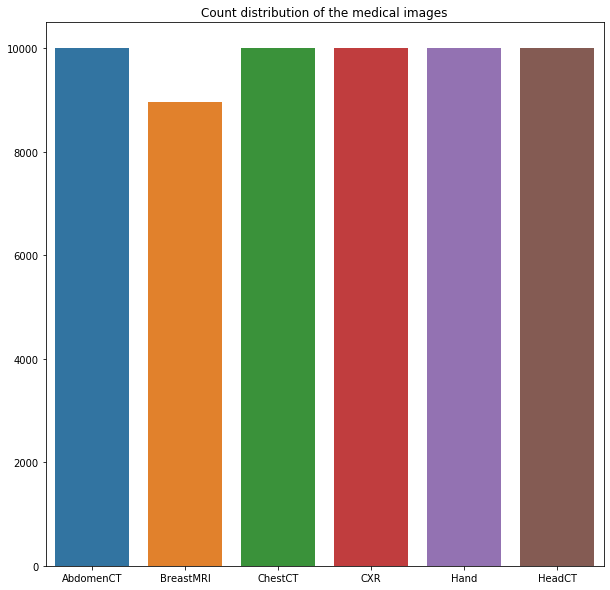

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(categories, number_of_classes)
plt.title("Count distribution of the medical images")
plt.show()

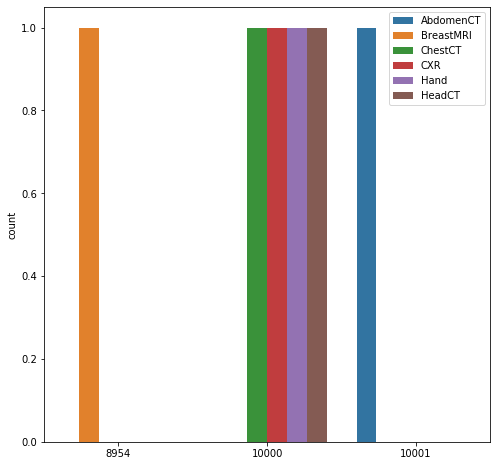

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(number_of_classes, hue = categories)

### Check images size

In [18]:
image_size=[]
for folder in os.listdir(path+"AbdomenCT"):
    files=gb.glob(pathname=str(path + "AbdomenCT//"+folder +"/*.jpeg"))
    for file in files:
        image=plt.imread(file)
        image_size.append(image.shape)
pd.Series(image_size).value_counts() 

Series([], dtype: int64)

### Sample images

In [ ]:
plt.figure(figsize=(5,5))
abdomen_img = mpimg.imread(path + "AbdomenCT/000000.jpeg")
plt.imshow(abdomen_img, cmap='gray')
plt.title("AbdomenCT")
print(abdomen_img.shape)

In [ ]:
breast_img = mpimg.imread(path + "BreastMRI/000000.jpeg")
plt.imshow(breast_img, cmap='gray')
plt.title("BreastMRI")
print(breast_img.shape)

In [ ]:
head_img = mpimg.imread(path + "HeadCT/000000.jpeg")
plt.imshow(head_img, cmap='gray')
plt.title("HeadCT")
print(head_img.shape)

In [ ]:
hand_img = mpimg.imread(path + "Hand/000000.jpeg")
plt.imshow(hand_img, cmap='gray')
plt.title("Hand")
print(hand_img.shape)

In [ ]:
chest_img = mpimg.imread(path + "ChestCT/000000.jpeg")
plt.imshow(chest_img, cmap='gray')
plt.title("chestCT")
print(chest_img.shape)

In [ ]:
cxr_img = mpimg.imread(path + "CXR/000000.jpeg")
plt.imshow(cxr_img, cmap='gray')
plt.title("CXR")
print(cxr_img.shape)

### CNN Architecture

In [19]:
# initialising the CNN
medical_cnn = Sequential()

In [20]:
# step 1 - convolutional layer
medical_cnn.add(Conv2D(filters=16, kernel_size= 3,activation='relu',input_shape=(64, 64,1)))

# step 2 pooling
medical_cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Adding second convolutional layer
medical_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
medical_cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Add the third convolutional layer
medical_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
medical_cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# flattening
medical_cnn.add(Flatten())

# fully connected layer
medical_cnn.add(Dense(units=64, activation='relu'))
medical_cnn.add(Dense(units=32, activation='relu'))
medical_cnn.add(Dropout(0.5))

# output layer
medical_cnn.add(Dense(units=6, activation='softmax'))

In [21]:
medical_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [22]:
medical_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

In [23]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",
                              patience=3,
                              restore_best_weights=True)

In [24]:
history = medical_cnn.fit(train_images, validation_data=val_images,
                         epochs=30, callbacks=[early_stopping])

Epoch 1/30
1180/1180 [==============================] - 603s 510ms/step - loss: 0.3516 - accuracy: 0.8719 - val_loss: 0.0115 - val_accuracy: 0.9981
Epoch 2/30
1180/1180 [==============================] - 483s 409ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.0085 - val_accuracy: 0.9981
Epoch 3/30
1180/1180 [==============================] - 398s 337ms/step - loss: 0.0240 - accuracy: 0.9915 - val_loss: 0.0048 - val_accuracy: 0.9981
Epoch 4/30
1180/1180 [==============================] - 177s 150ms/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.0081 - val_accuracy: 0.9980
Epoch 5/30
1180/1180 [==============================] - 235s 199ms/step - loss: 0.0194 - accuracy: 0.9918 - val_loss: 0.0058 - val_accuracy: 0.9982
Epoch 6/30
1180/1180 [==============================] - 416s 352ms/step - loss: 0.0171 - accuracy: 0.9939 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 7/30
1180/1180 [==============================] - 367s 311ms/step - loss: 0.0149 - accuracy: 0.9948 - val_

In [25]:
testing_acc = medical_cnn.evaluate(test_images)
print("the testing accuracy is :", testing_acc[1]*100, '%')

369/369 [==============================] - 131s 356ms/step - loss: 0.0076 - accuracy: 0.9990
the testing accuracy is : 99.89822506904602 %


In [27]:
preds = medical_cnn.predict(test_images,verbose = 1)

369/369 [==============================] - 106s 287ms/step


In [30]:
# Predict the label of the test_images
pred = medical_cnn.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Hand', 'Hand', 'HeadCT', 'AbdomenCT', 'AbdomenCT']


In [31]:
y_test = list(test_df.Label)

In [68]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00      2018
   BreastMRI       1.00      1.00      1.00      1847
         CXR       1.00      1.00      1.00      2013
     ChestCT       1.00      1.00      1.00      1984
        Hand       1.00      1.00      1.00      2023
      HeadCT       1.00      1.00      1.00      1906

    accuracy                           1.00     11791
   macro avg       1.00      1.00      1.00     11791
weighted avg       1.00      1.00      1.00     11791



In [34]:
Index = ["AbdomenCT","BreastMRI","CXR","ChestCT","Hand","HeadCT"]
column = ["AbdomenCT","BreastMRI","CXR","ChestCT","Hand","HeadCT"]

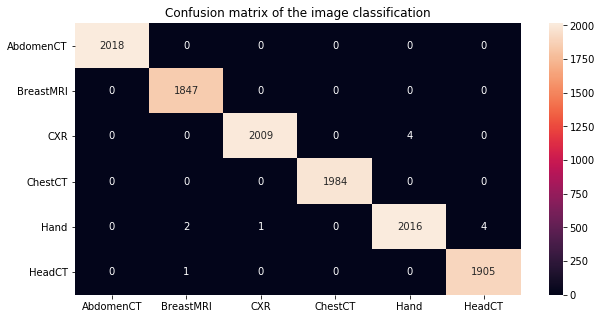

In [35]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,5))
cm = pd.DataFrame(data=confusion_matrix(y_test, pred),index=Index,columns=column)
plt.xlabel("Actual images")
plt.ylabel("Predicted images")
plt.title("Confusion matrix of the image classification")
sns.heatmap(cm, annot=True,fmt="d")

In [66]:
def plot_result(history):
    f = plt.figure(figsize=(10,8))
    plt.subplot(121)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model Training and validation Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(['training accuracy', 'validation Accuracy'], loc = "best")
    plt.subplot(122)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model training and validation Loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["training loss", "validation loss"], loc = "upper right")
    plt.show()

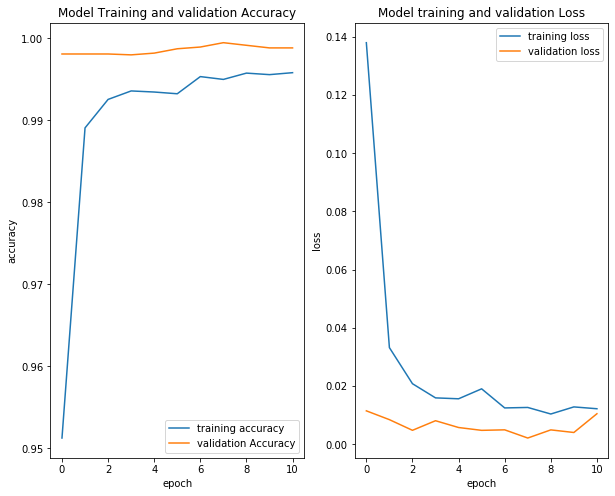

In [67]:
plot_result(history)

In [65]:
f =plt.savefig('plot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Predictions 

We are going to make predictions for the whole dataset as well as predicting a single image.


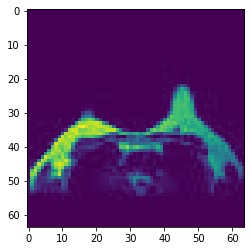

In [56]:
from keras.preprocessing import image
img_path = 'C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST/BreastMRI/000002.jpeg'
img = image.load_img(img_path, target_size=(64, 64), color_mode="grayscale")
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

Img_pred = medical_cnn.predict(img_batch)
plt.imshow(np.squeeze(img_batch))
plt.show()

In [ ]:
img_path = 'C:/Users/laptop2/OneDrive/Desktop/Computer Science/Machine Vision/course_work/MNIST/BreastMRI/000002.jpeg'
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')

# preprocessing the image 
img = image.img_to_array(img)
Img = img/255
Img = np.expand_dims(img, axis = 0)

# predict the image
Img_pred = medical_cnn.predict(Img)
print(p)

# visualise the predicted image 
plt.figure(figsize=(6,6))
plt.imshow(Img_pred)
plt.show()

#     img = image.load_img(dir_path+'//'+i, target_size =(64, 64), col)
#     plt.imshow(img)
#     plt.show()
    
#     x = image.img_to_array(img)
#     x = np.expand_dims(x_axis = 0)
#     images = np.vstack([x])
#     val = medical_cnn(images)

## Visualize some of the predicted images 

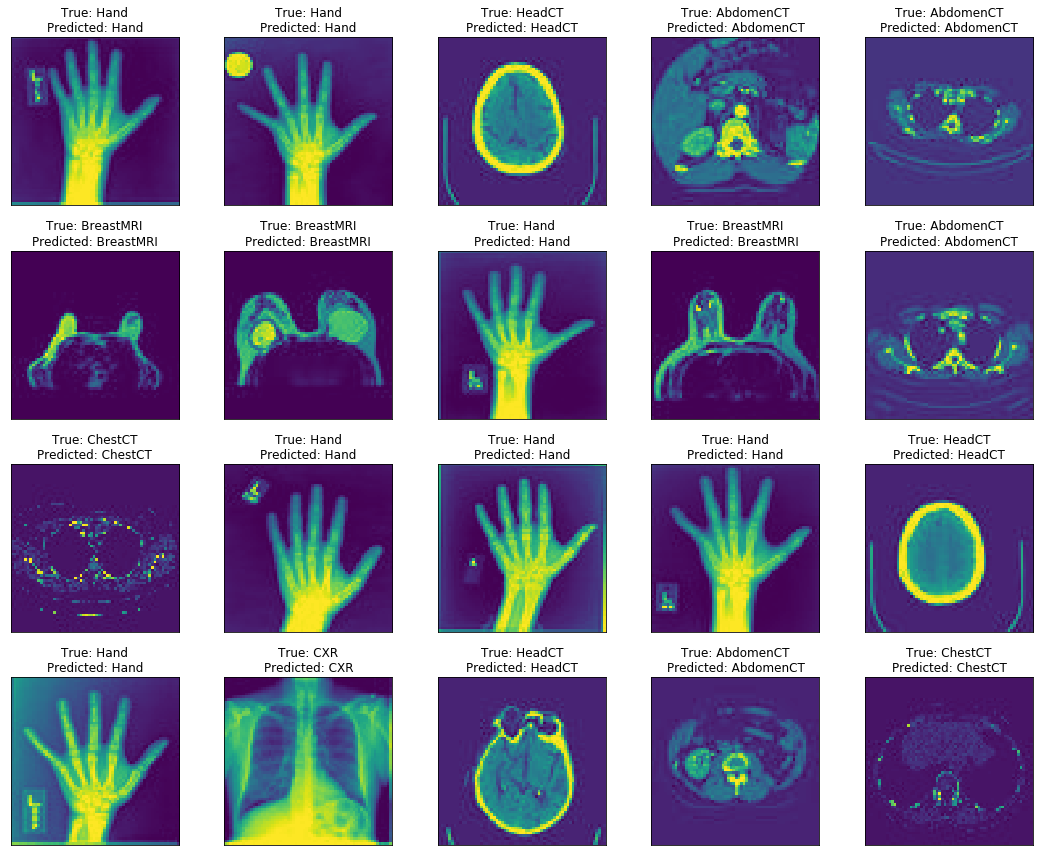

<Figure size 432x288 with 0 Axes>

In [62]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}")
plt.tight_layout()
plt.show()
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')